# 1. NLTK 자연어 처리 패키지

## 1. NLTK 패키지

In [1]:
import nltk

In [2]:
# c:/nltk_data
# d:/nltk_data
# e:/nltk_data
# c:/Users/컴퓨터이름/nltk_data
# c:/Users/컴퓨터이름/anaconda3/nltk_data
# c:/Users/컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/컴퓨터이름/anaconda3/Roaming/nltk_data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [58]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:50])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I





In [59]:
len(emma)

887071

In [9]:
# sent_tokenize() : 문장 단위로 쪼갠 list 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print("문장 수 : ", len(sent_tokens))
print("%r"%(sent_tokens[10]))

문장 수 :  7493
'It was on the wedding-day\nof this beloved friend that Emma first sat in mournful thought\nof any continuance.'


In [10]:
# word_tokenize() 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[10]))

['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']


In [11]:
# regexpTokenizer 클래스 : 토큰화할 때 정규표현식 이용
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]+')
print(ret.tokenize(sent_tokens[10]))

['It', 'was', 'on', 'the', 'wedding', 'day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance']


## 2. 형태소(의미가 있는 가장 작은 말의 단위) 분석
- cf. 자연어 처리의 기본은 형태소 분석과 품사태깅
    - 어간 추출(Stemming)
    - 원형 복원(Lemmatizing)
    - 품사 태깅(Part of Speech Tagging)

In [71]:
words = ['sending', 'cooking', 'files', 'lives', 'crying','dying','add','카이트']
# 어간 추출(1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2])

('send', 'cook', 'file')

In [64]:
[pst.stem(w) for w in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [65]:
# 어간 추출(2) : LancasterStemmer - 어간 추출하는 것 중 제일 많이 쓴다
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(w) for w in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [15]:
# 어간 추출(3) : RegexpStemmer
from nltk.stem import RegexpStemmer
rst = RegexpStemmer("ing")
[rst.stem(w) for w in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [16]:
# 어간 추출을 할 경우 의미가 달라질 수 있어 원형복원을 한다.
word2 = ['belives', 'cooking']
[lst.stem(w) for w in word2]

['bel', 'cook']

In [17]:
# 원형복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(w) for w in word2]

['belives', 'cooking']

In [18]:
# 품사 태깅
# dbrang.tistory.com/1139
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[10]))
print(word_tokenize(sent_tokens[10]))
print("\n품사태깅결과\n", tagged_list)

['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']

품사태깅결과
 [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


퀴즈 : emma 소설안에서
1. 특수문자 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅을 하시오.
2. "Emma" 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오.
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 개수를 출력하시오.

In [19]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [33]:
#1
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]{3,}')
words=ret.tokenize(emma)
pos_tag(words)

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('unite', 'JJ'),
 ('some', 'DT'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('distress', 'NN'),
 ('vex', 'IN'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 ('most', 'RBS'),
 ('affectionate', 'JJ'),
 ('indulgent', 'NN'),
 ('father', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('consequ

In [38]:
#2
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]{3,}')
words=ret.tokenize(emma)
print(set([i for i in pos_tag(words) if i[0]=='Emma']))
print(len([i for i in pos_tag(words) if i[0]=='Emma']))

{('Emma', 'NNS'), ('Emma', 'VB'), ('Emma', 'VBD'), ('Emma', 'NNP'), ('Emma', 'RB'), ('Emma', 'NN'), ('Emma', 'VBP'), ('Emma', 'VBN'), ('Emma', 'JJ'), ('Emma', 'NNPS')}
865


In [39]:
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[Emma]{4}')
words=ret.tokenize(emma)
print(set([i for i in pos_tag(words) if i[0]=='Emma']))
print(len([i for i in pos_tag(words) if i[0]=='Emma']))

{('Emma', 'NNP')}
865


In [43]:
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('(\W|^)(Emma)(\W|$)')
words = [i[1] for i in ret.tokenize(emma)]
print(set([i for i in pos_tag(words) if i[0]=='Emma']))
print(len([i for i in pos_tag(words) if i[0]=='Emma']))

{('Emma', 'NNP')}
865


In [48]:
#3
words=word_tokenize(emma)
len([i for i in pos_tag(words) if i[1]=='NN'])

19118

In [50]:
n_text=[i[0] for i in pos_tag(words) if i[1]=='NN']

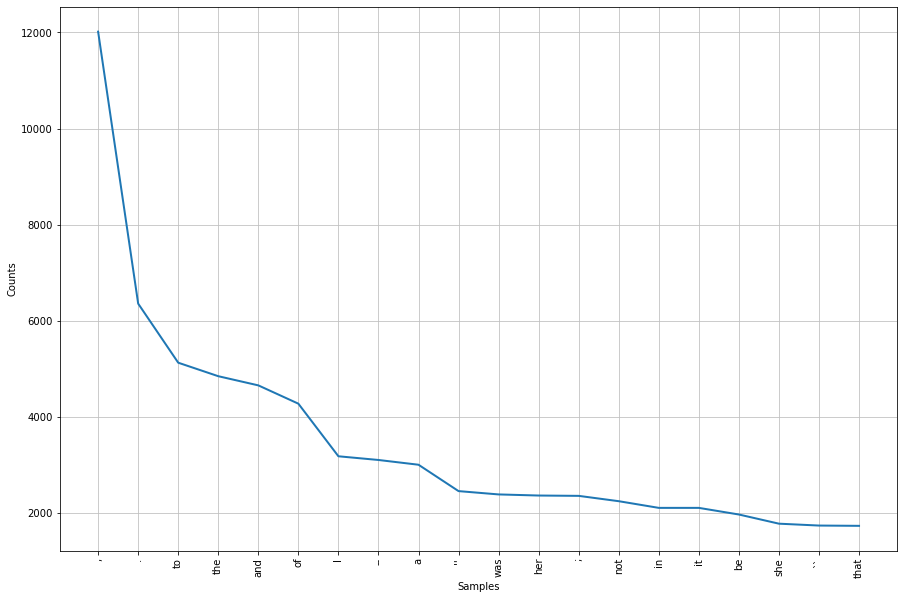

In [47]:
import matplotlib.pyplot as plt 
words=word_tokenize(emma)
e_text=Text(words)
plt.figure(figsize=(15,10))
e_text.plot(20)

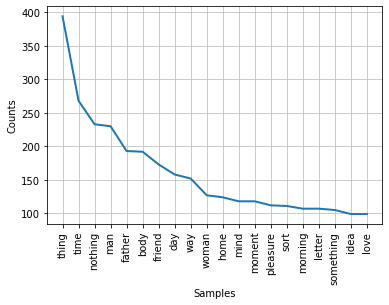

In [52]:
Text(n_text).plot(20)

In [55]:
FreqDist(n_text)

FreqDist({'thing': 394, 'time': 268, 'nothing': 233, 'man': 230, 'father': 193, 'body': 192, 'friend': 173, 'day': 158, 'way': 152, 'woman': 127, ...})

In [57]:
[i for i,  j in FreqDist(n_text).items() if j>150]

['father', 'friend', 'way', 'man', 'day', 'body', 'time', 'thing', 'nothing']